# Imports

In [81]:
import pandas as pd
from polyglot.text import Text
from textblob import TextBlob
import matplotlib.pyplot as plt

# Data

In [103]:
df1 = pd.read_csv('./data/all-the-news/articles1.csv')
df2 = pd.read_csv('./data/all-the-news/articles2.csv')
df3 = pd.read_csv('./data/all-the-news/articles3.csv')
df = pd.concat([df1, df2, df3])

In [83]:
df.head(5)

,Unnamed: 0,id,title,publication,author,date,year,month,url,content
0,0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...
1,1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood..."
2,2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t..."
4,4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ..."


Extracting publication-level data about sentiment and subjectivity.

In [84]:
def get_title_sentiment_polarity(row):
    if isinstance(row['title'], str):
        return TextBlob(row['title']).sentiment.polarity
    return 0

In [85]:
df['title_sentiment_polarity'] = df.apply(get_title_sentiment_polarity, axis=1)

In [86]:
def get_title_subjectivity(row):
    if isinstance(row['title'], str):
        return TextBlob(row['title']).sentiment.subjectivity
    return 0

In [87]:
df['title_subjectivity'] = df.apply(get_title_subjectivity, axis=1)

In [89]:
df_temporary = df[['publication', 'title_sentiment_polarity', 'title_subjectivity']]
df_temporary = df_temporary.groupby(['publication']).mean().reset_index()

In [97]:
df_temporary.head(10)

,publication,title_sentiment_polarity,title_subjectivity
0,Atlantic,0.026798,0.188560
11,Reuters,0.019817,0.194910
8,National Review,0.013921,0.195998
4,CNN,0.024422,0.201023
5,Fox News,0.016723,0.222417
12,Talking Points Memo,0.030447,0.225021
1,Breitbart,0.009664,0.235041
7,NPR,0.043614,0.249092
3,Buzzfeed News,0.028023,0.256399
6,Guardian,0.032751,0.261062


In [98]:
df_temporary = df_temporary.sort_values(by=['title_sentiment_polarity'])

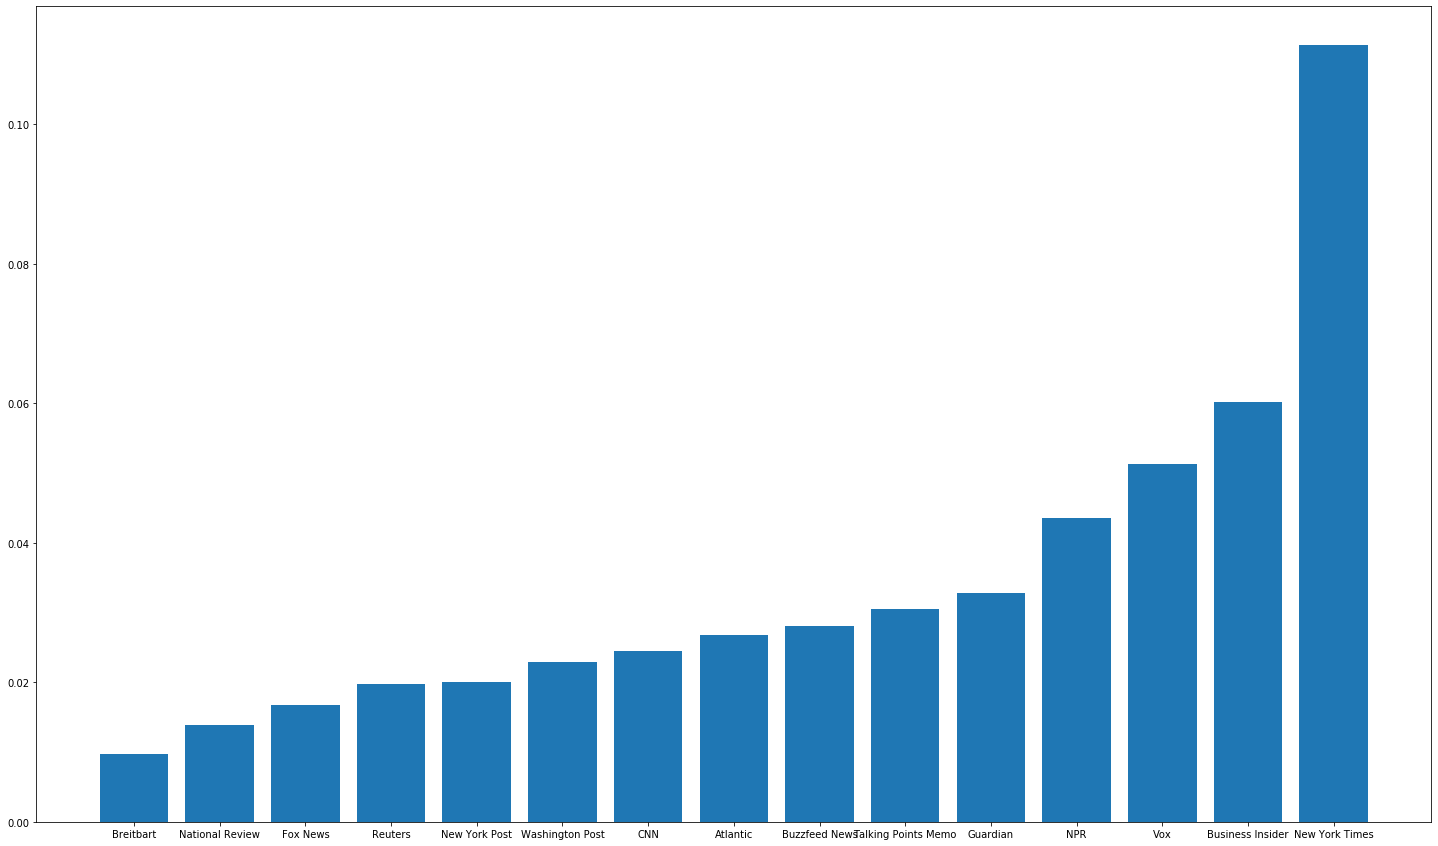

In [99]:
plt.figure(figsize=(25,15))
plt.bar(x=df_temporary['publication'].values, height=df_temporary['title_sentiment_polarity'].values)
plt.show()

In [100]:
df_temporary = df_temporary.sort_values(by=['title_subjectivity'])

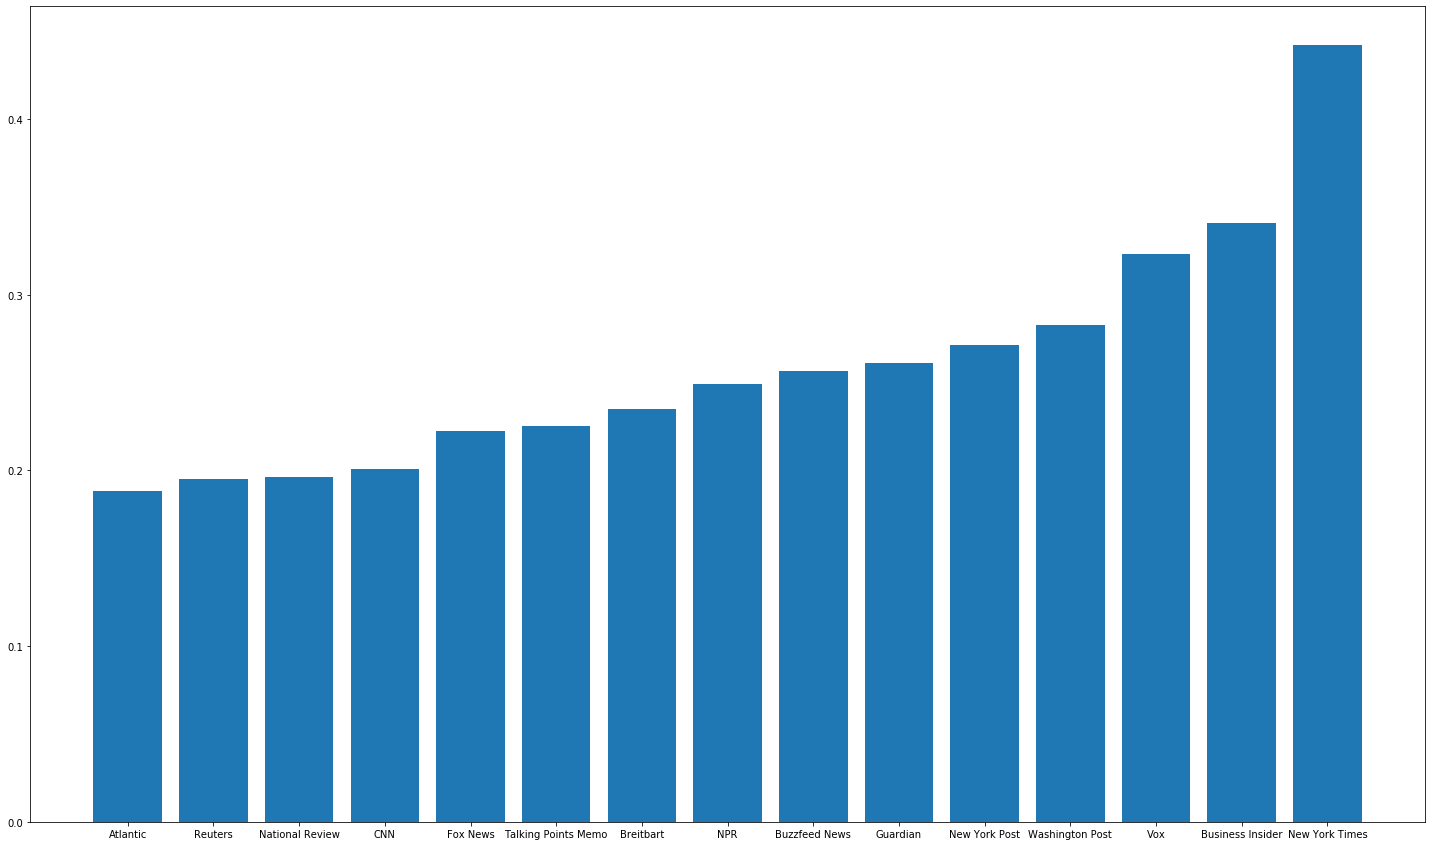

In [101]:
plt.figure(figsize=(25,15))
plt.bar(x=df_temporary['publication'].values, height=df_temporary['title_subjectivity'].values)
plt.show()